In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/GSTR Packed Compiled.csv')

In [3]:
df.head()

,order_id,item_id,sku_id,packet_id,pps_item_id,order_status,item_status,gender,payment_method,quantity,...,Tax_Seller_GSTIN,base_amount,tds_rate,tcs_amount,tds_amount,cgst_tcs_amount,sgst_tcs_amount,igst_tcs_amount,Unnamed: 63,Unnamed: 64
0,7939973314,9939952190,52849098,7939973314,6.963157e+09,C,C,Women,on,1,...,07AAMPM7556K1Z1,919.04,0.01,9.19,9.19,0.0,0.0,9.19,NaN,NaN
1,7939988975,9939967851,49061674,7939988975,6.963190e+09,C,C,Women,on,1,...,07AAMPM7556K1Z1,1473.21,0.01,14.73,14.73,0.0,0.0,14.73,NaN,NaN
2,7939536716,9939515591,65782456,7939536716,6.962217e+09,C,C,Women,cod,1,...,07AAMPM7556K1Z1,1478.57,0.01,14.78,14.78,0.0,0.0,14.78,NaN,NaN
3,7945977087,9945955974,95280518,7945977087,6.976391e+09,C,C,Women,on,1,...,07AAMPM7556K1Z1,2053.57,0.01,20.53,20.53,0.0,0.0,20.53,NaN,NaN
4,7951563493,9951542386,94164944,7951563493,6.990610e+09,C,C,Women,on,1,...,07AAMPM7556K1Z1,919.04,0.01,9.19,9.19,0.0,0.0,9.19,NaN,NaN


In [4]:
len(df[df['order_status']=='RTO'])

237

In [5]:
df.columns

Index(['order_id', 'item_id', 'sku_id', 'packet_id', 'pps_item_id',
       'order_status', 'item_status', 'gender', 'payment_method', 'quantity',
       'order_created_date', 'order_packed_date', 'order_shipped_date',
       'order_rto_date', 'master_category', 'brand', 'article_type',
       'seller_id', 'seller_name', 'seller_type', 'pincode', 'is_try_and_buy',
       'warehouse_id', 'warehouse_name', 'Shipping_case', 'state', 'address',
       'location', 'tax_rate', 'igst_rate', 'cgst_rate', 'sgst_rate',
       'igst_amt', 'tax_amount', 'loyalty_credit', 'loyalty_Amount',
       'InvoiceAmount', 'shipment_value', 'platform_charges', 'MRP',
       'shipping_charges', 'gift_charges', 'Discount', 'cashback',
       'Tax_user_rec', 'GiftCard', 'wallet', 'Vat_refund', 'Mynts_Used',
       'Instant_Cashback', 'Value_Shipping', 'TCS', 'Net_Amount',
       'New_Parent_id', 'Seller_GSTIN', 'Tax_Seller_GSTIN', 'base_amount',
       'tds_rate', 'tcs_amount', 'tds_amount', 'cgst_tcs_amount',
 

In [6]:
df=df.drop(columns=['Unnamed: 63','Unnamed: 64','item_id','packet_id','item_status','brand','seller_id','seller_name','seller_type','pincode','is_try_and_buy','warehouse_id','warehouse_name','state','address'])

In [7]:
df['Total_Profit'] = (
    df['InvoiceAmount'].fillna(0)
    - df['platform_charges'].fillna(0)
    - df['TCS'].fillna(0)
    - df['tds_amount'].fillna(0)
)


**Frequency of Orders**: We can determine how many orders were placed during a specific time frame (daily, weekly, monthly). This helps in understanding order volume trends

In [8]:
df['order_created_date'] = df['order_created_date'].astype(str)
df['order_packed_date'] = df['order_packed_date'].astype(str)
df['order_shipped_date'] = df['order_shipped_date'].astype(str)
df['order_rto_date'] = df['order_rto_date'].astype(str).str.replace('.0', '', regex=False)


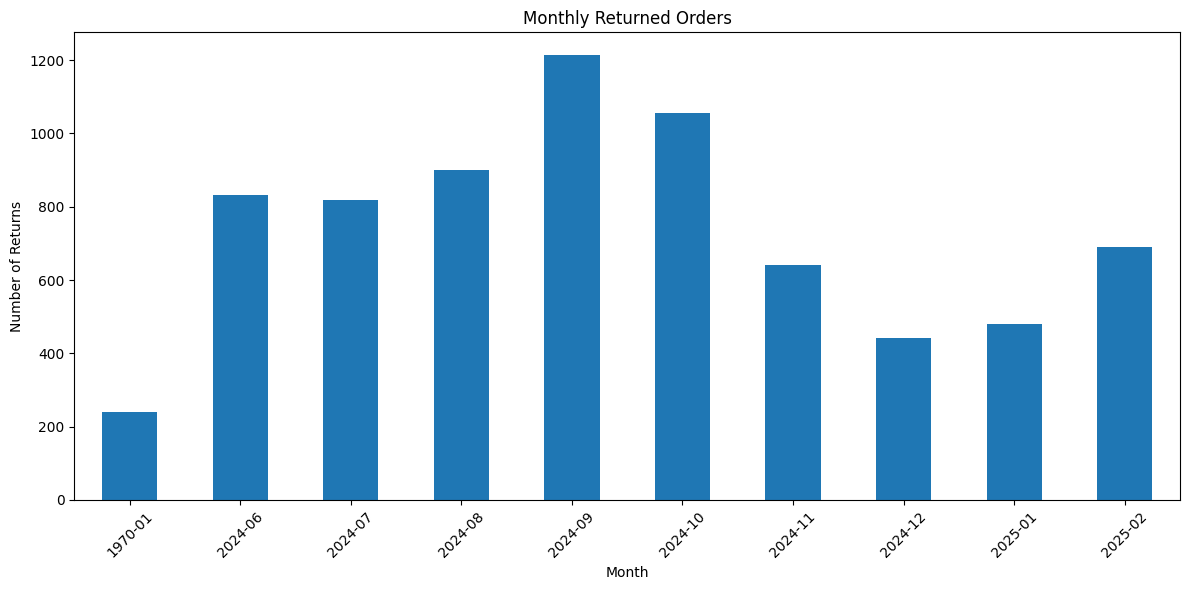

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter returned orders
returned_orders = df[df['order_status'].isin(['C', 'RTO', 'F'])].copy()  # <-- copy to avoid warning

# 2. Convert 'order_shipped_date' to datetime safely
returned_orders['order_shipped_date'] = pd.to_datetime(returned_orders['order_shipped_date'], errors='coerce')

# 3. Create a 'Year-Month' column
returned_orders['YearMonth'] = returned_orders['order_shipped_date'].dt.to_period('M')

# 4. Group by YearMonth
monthly_returns = returned_orders.groupby('YearMonth').size()

# 5. Plot
plt.figure(figsize=(12,6))
monthly_returns.plot(kind='bar')
plt.title('Monthly Returned Orders')
plt.xlabel('Month')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


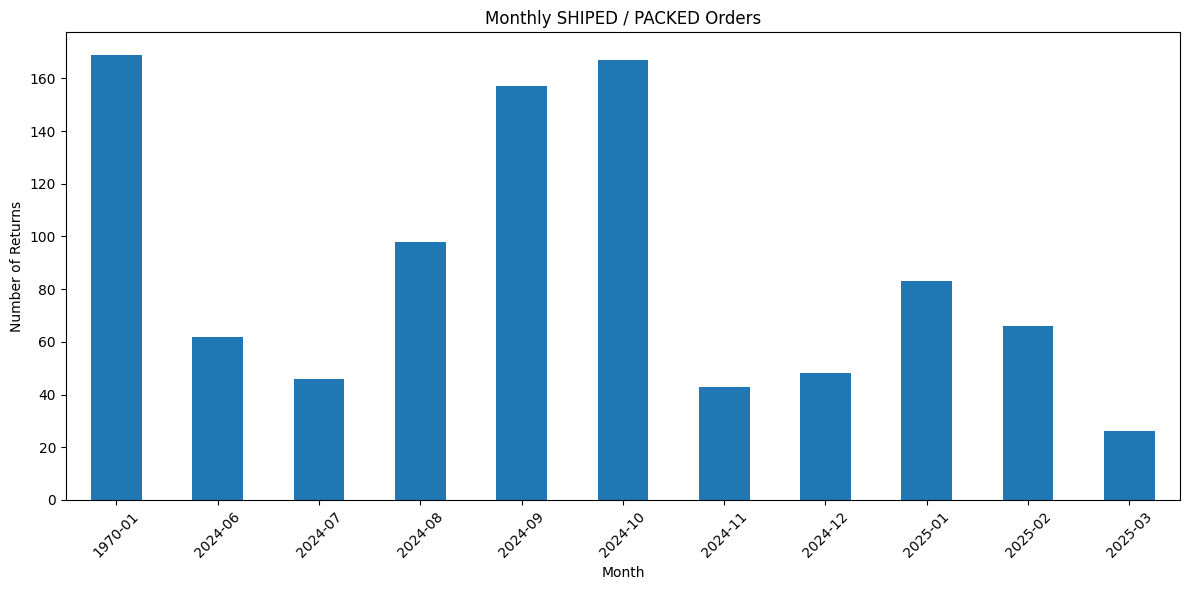

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Filter returned orders
returned_orders = df[df['order_status'].isin(['SH', 'PK'])].copy()  # <-- copy to avoid warning

# 2. Convert 'order_shipped_date' to datetime safely
returned_orders['order_shipped_date'] = pd.to_datetime(returned_orders['order_shipped_date'], errors='coerce')

# 3. Create a 'Year-Month' column
returned_orders['YearMonth'] = returned_orders['order_shipped_date'].dt.to_period('M')

# 4. Group by YearMonth
monthly_returns = returned_orders.groupby('YearMonth').size()

# 5. Plot
plt.figure(figsize=(12,6))
monthly_returns.plot(kind='bar')
plt.title('Monthly SHIPED / PACKED Orders')
plt.xlabel('Month')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
monthly_returns

,0
YearMonth,
1970-01,169
2024-06,62
2024-07,46
2024-08,98
2024-09,157
2024-10,167
2024-11,43
2024-12,48
2025-01,83


In [12]:
# Find rows where 'order_shipped_date' is missing or wrong
problematic_orders = returned_orders[returned_orders['order_shipped_date'].isna() | (returned_orders['order_shipped_date'].dt.year == 1970)]

print(problematic_orders[['order_shipped_date', 'order_status']])


     order_shipped_date order_status
317          1970-01-01           PK
369          1970-01-01           PK
397          1970-01-01           PK
486          1970-01-01           PK
510          1970-01-01           PK
...                 ...          ...
7994         1970-01-01           PK
8030         1970-01-01           PK
8131         1970-01-01           PK
8151         1970-01-01           PK
8264         1970-01-01           PK

[169 rows x 2 columns]


In [13]:
df['order_created_date'] = pd.to_datetime(df['order_created_date'], format='%Y%m%d')
df['order_packed_date'] = pd.to_datetime(df['order_packed_date'], format='%Y%m%d')
df['order_shipped_date'] = pd.to_datetime(df['order_shipped_date'], format='%Y%m%d')
df['order_rto_date'] = pd.to_datetime(df['order_rto_date'], format='%Y%m%d')


<ipython-input-14-6843481a172d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df_copy['order_id'].resample('M').count()


<Axes: title={'center': 'Monthly order Frequency'}, xlabel='order_created_date'>

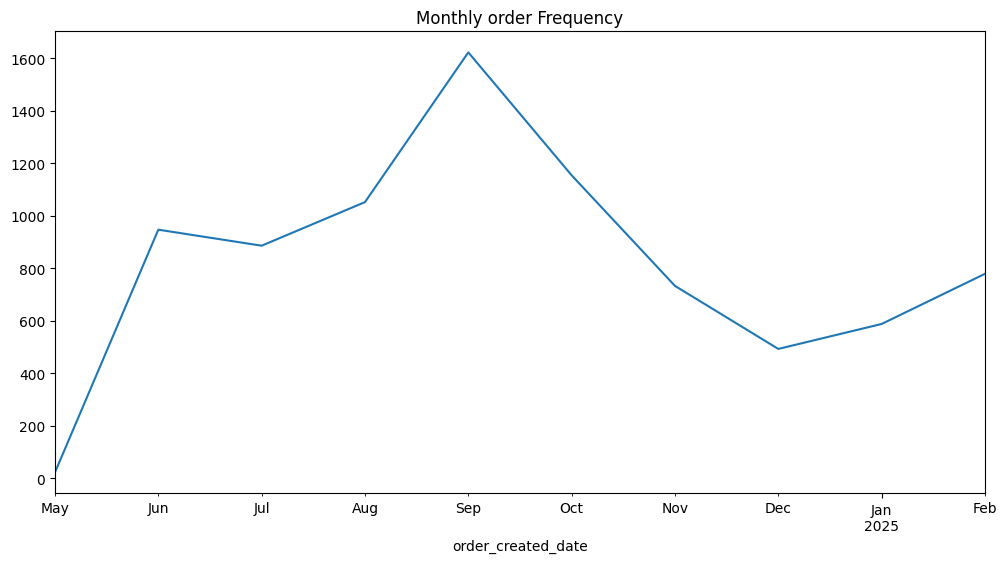

In [14]:
df_copy = df.set_index('order_created_date')
monthly_orders = df_copy['order_id'].resample('M').count()
monthly_orders.plot(kind='line', title='Monthly order Frequency', figsize=(12,6))


<Axes: title={'center': 'Orders by Day of the Week'}, xlabel='day_of_week'>

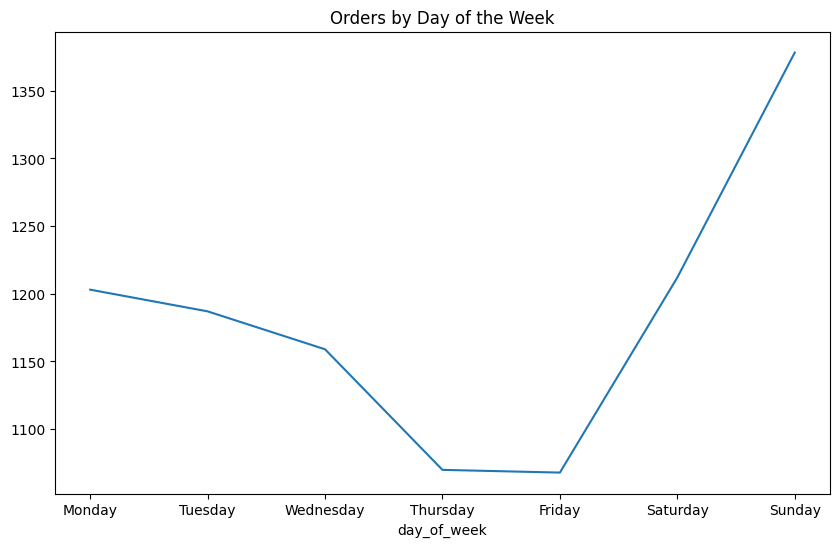

In [15]:
df['day_of_week'] = df['order_created_date'].dt.day_name()
dow_order = df.groupby('day_of_week')['order_id'].count()
dow_orders = dow_order.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
dow_orders.plot(kind='line', title='Orders by Day of the Week', figsize=(10,6))


<Axes: title={'center': 'Number of Orders Per Day'}, xlabel='order_created_date'>

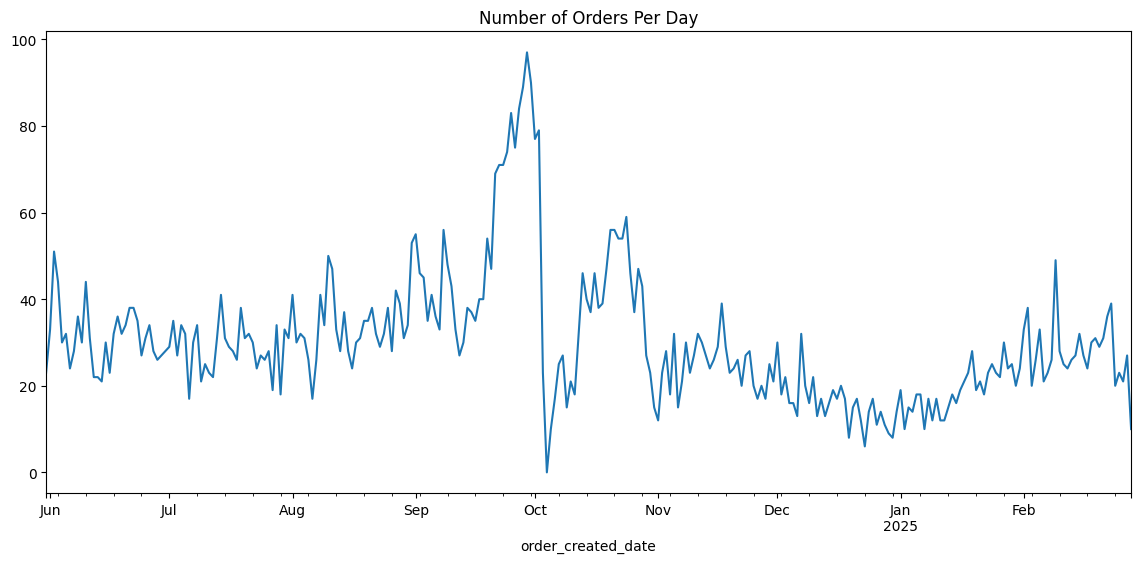

In [16]:
# Make sure order_created_date is datetime
df['order_created_date'] = pd.to_datetime(df['order_created_date'], format='%Y%m%d')

# Set it as index
df.set_index('order_created_date', inplace=True)

# Resample by day
orders_per_day = df['order_id'].resample('D').count()

# Plot
orders_per_day.plot(kind='line', figsize=(14,6), title='Number of Orders Per Day')


**OBSERVATIONS**


*   Maximum Monthly order Frequency - September
*   SATURDAY and SUNDAYS have a liitle higher order place



**Order Status Trends**: By grouping by Order ID, we can check the status of orders (e.g., cancelled, shipped, delivered) and analyze patterns in the order journey.


In [17]:
df['order_status'].value_counts()

,count
order_status,
C,6580
SH,796
F,495
RTO,237
PK,169


<Axes: xlabel='order_status'>

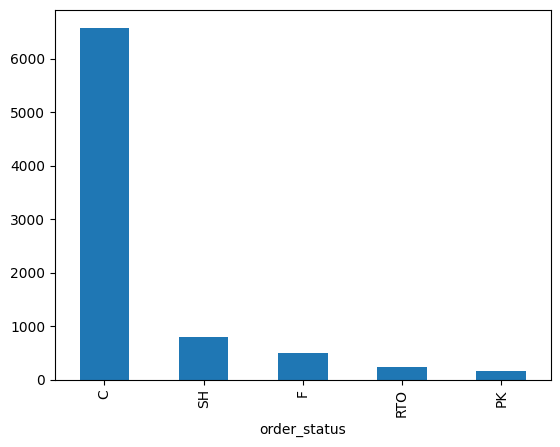

In [18]:
 import matplotlib.pyplot as plt
order_status_counts = df['order_status'].value_counts()
order_status_counts.plot(kind='bar')

**Cancelled vs. Completed Orders**: We can calculate the proportion of cancelled orders versus completed ones, helping to understand the cancellation rate.


In [20]:
df['order_info'] = df['order_status'].apply(lambda x: 'Cancelled' if ('c' in x.lower() or 'f' in x.lower() or 'rto' in x.lower()) else 'Completed')


<Axes: ylabel='count'>

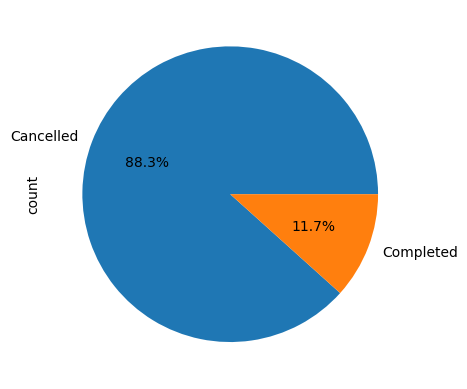

In [21]:
df['order_info'].value_counts().plot(kind='pie', autopct='%1.1f%%')

**Order Correlation with Profit**: We could link each order to its profit, then examine whether the number of orders impacts overall profit.
SK

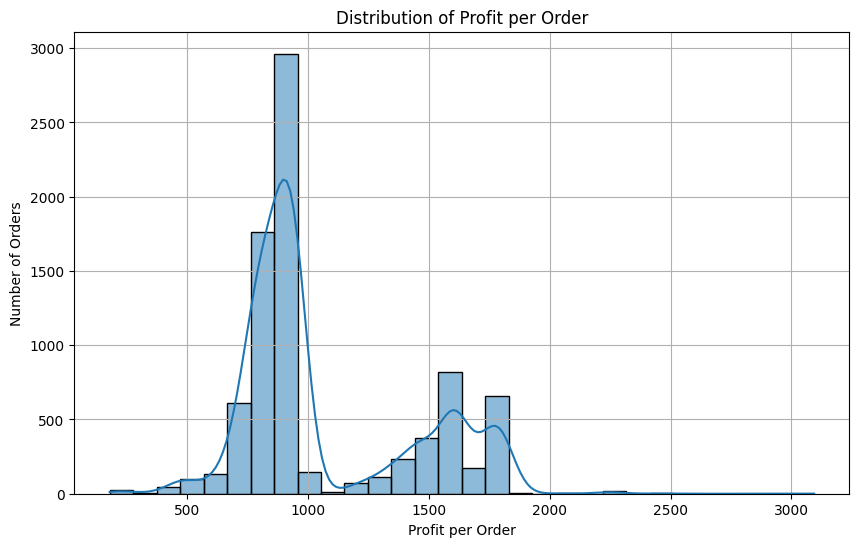

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
order_profit = df.groupby('order_id')['Total_Profit'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.histplot(order_profit['Total_Profit'], kde=True, bins=30)
plt.title('Distribution of Profit per Order')
plt.xlabel('Profit per Order')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


**Product-Level Analysis:** SKU represents a specific product variant, so analyzing the frequency of each SKU can help identify top-performing and underperforming products.

<Axes: xlabel='sku_id'>

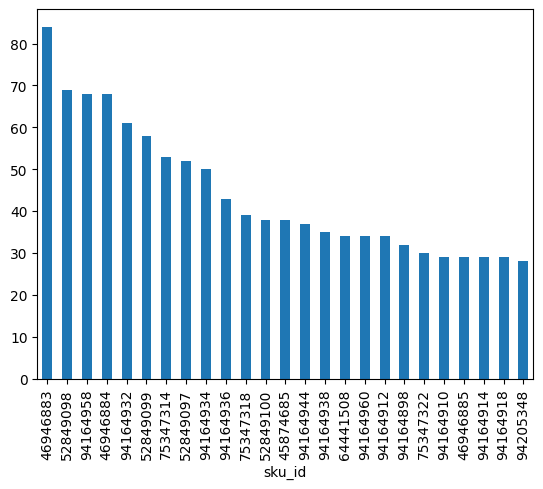

In [23]:
df['sku_id'].value_counts(ascending=False).head(25).plot(kind='bar')


<Axes: title={'center': 'Top 25 SKUs (Completed Orders Only)'}, xlabel='sku_id'>

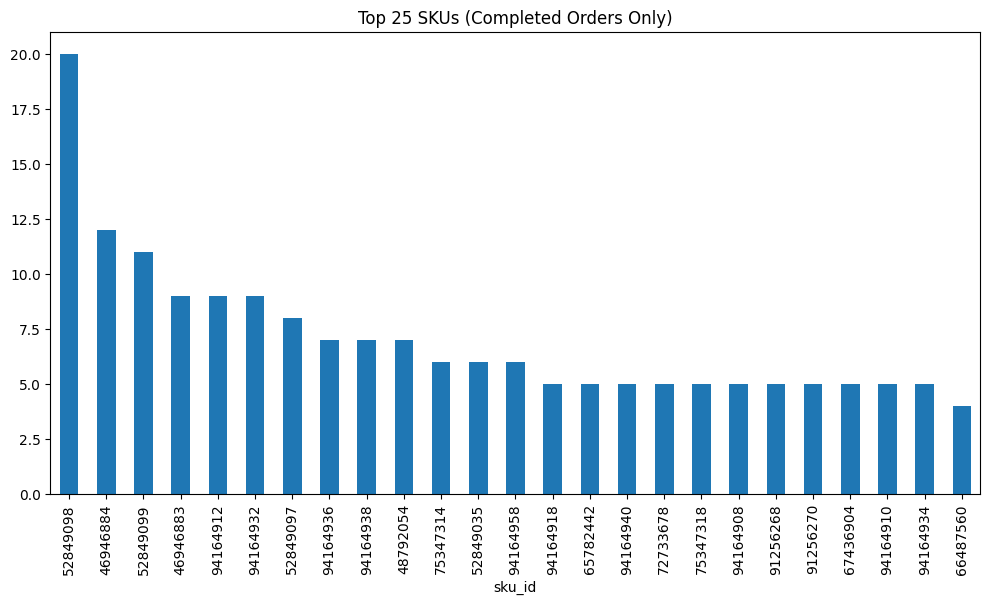

In [24]:
completed_orders = df[df['order_info'] == 'Completed']
top_completed_skus = completed_orders['sku_id'].value_counts(ascending=False).head(25)
top_completed_skus.plot(kind='bar', figsize=(12,6), title='Top 25 SKUs (Completed Orders Only)')

<Axes: title={'center': 'Top 25 article_type(Completed Orders Only)'}, xlabel='article_type'>

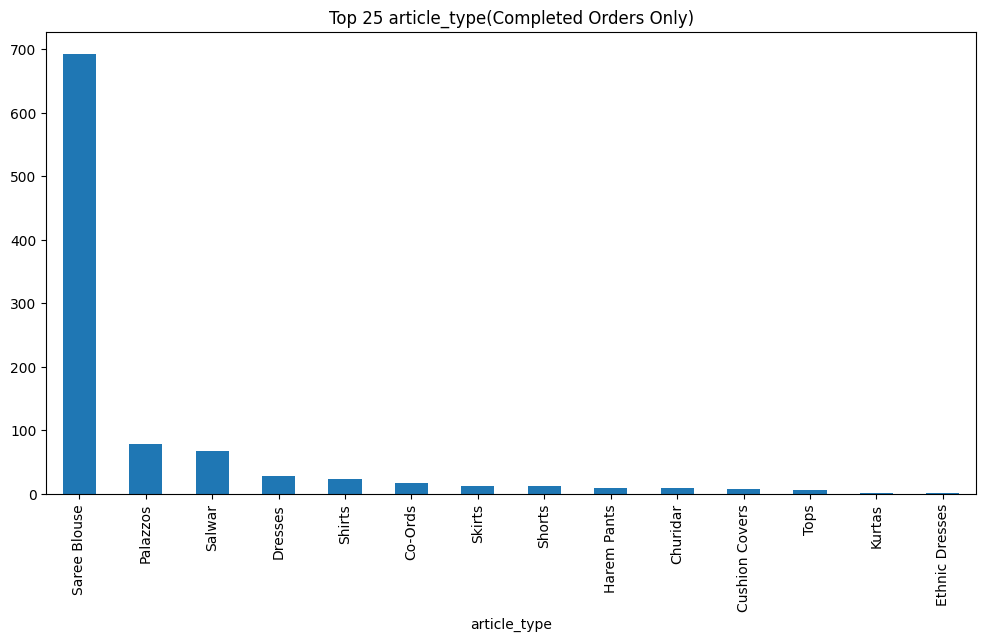

In [25]:
completed_orders = df[df['order_info'] == 'Completed']
top_completed_skus = completed_orders['article_type'].value_counts(ascending=False).head(25)
top_completed_skus.plot(kind='bar', figsize=(12,6), title='Top 25 article_type(Completed Orders Only)')

<Axes: title={'center': 'Top 25 article_type(Cancelled Orders Only)'}, xlabel='article_type'>

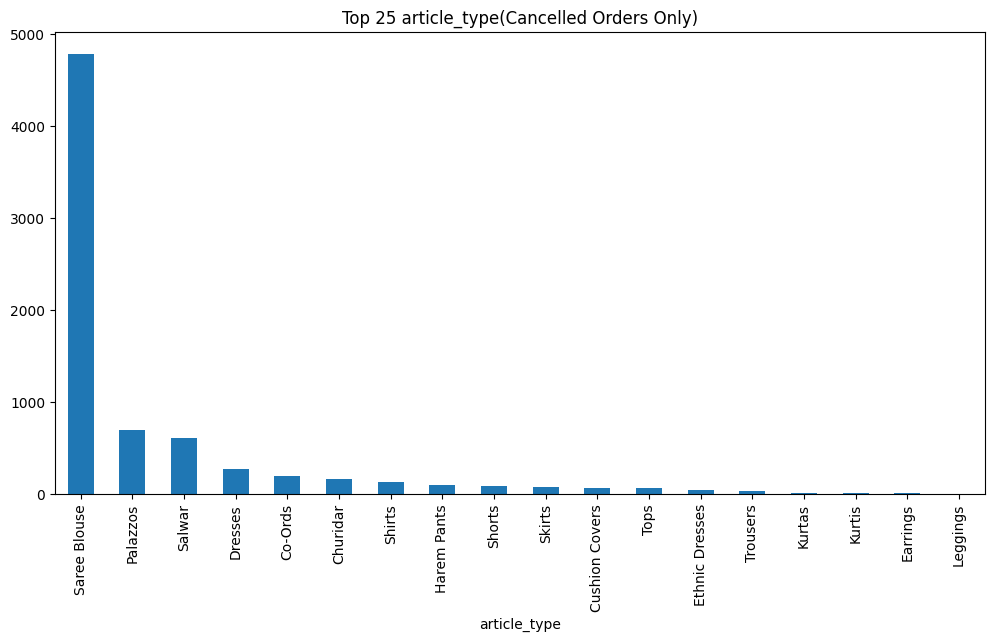

In [26]:
cancelled_orders = df[df['order_info'] == 'Cancelled']
top_cancelled_skus = cancelled_orders['article_type'].value_counts(ascending=False).head(25)
top_cancelled_skus.plot(kind='bar', figsize=(12,6), title='Top 25 article_type(Cancelled Orders Only)')

**Return/Exchange Rate by SKU:** By correlating SKU with order cancellations or returns, we can pinpoint which products are more likely to be returned, helping identify issues with specific items (e.g., quality issues, customer dissatisfaction).


<Axes: title={'center': 'Top 25 SKUs - Completed vs Not Completed Orders'}, xlabel='sku_id'>

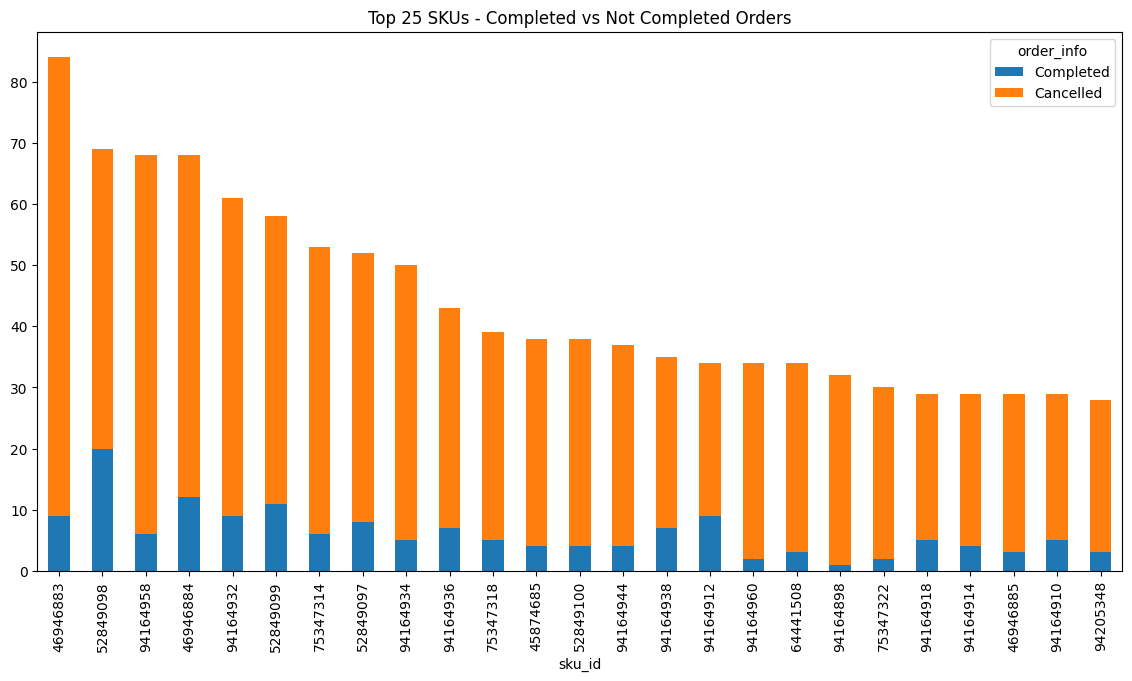

In [27]:
# Create a pivot table that counts Completed and Not Completed orders for each SKU
sku_status_counts = df.groupby(['sku_id', 'order_info']).size().unstack(fill_value=0)

# Select top 25 SKUs based on total number of orders
top_25_skus = sku_status_counts.sum(axis=1).sort_values(ascending=False).head(25)

# Filter to include only these top 25 SKUs
sku_status_top25 = sku_status_counts.loc[top_25_skus.index]

# Reorder columns: Completed first, then Not Completed (Cancelled)
sku_status_top25 = sku_status_top25[['Completed', 'Cancelled']]  # Very important

# Plot stacked bar chart
sku_status_top25.plot(kind='bar', stacked=True, figsize=(14,7), title='Top 25 SKUs - Completed vs Not Completed Orders')


<Axes: title={'center': 'Top 25 Articles - Completed vs Not Completed Orders'}, xlabel='article_type'>

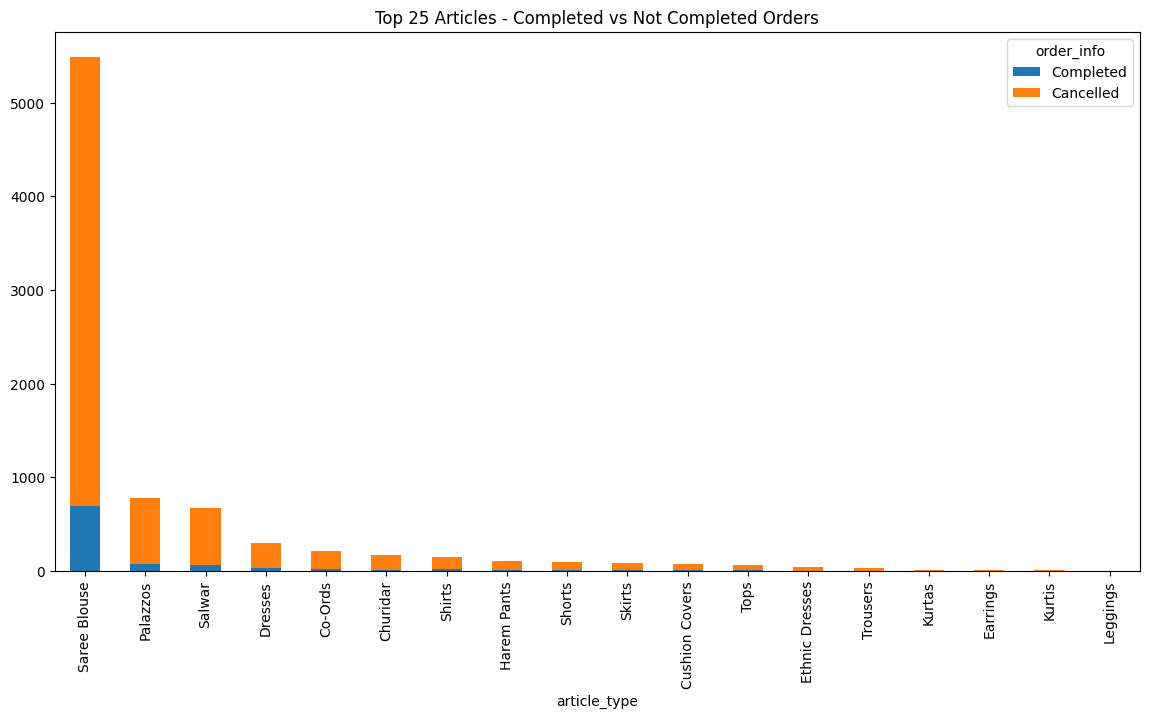

In [28]:
# Create a pivot table that counts Completed and Not Completed orders for each SKU
article_status_counts = df.groupby(['article_type', 'order_info']).size().unstack(fill_value=0)

# Select top 25 articles based on total number of orders
top_25_articles = article_status_counts.sum(axis=1).sort_values(ascending=False).head(25)

# Filter to include only these top 25 articles
article_status_top25 = article_status_counts.loc[top_25_articles.index]

# Reorder columns: Completed first, then Not Completed (Cancelled)
article_status_top25 = article_status_top25[['Completed', 'Cancelled']]  # Very important

# Plot stacked bar chart
article_status_top25.plot(kind='bar', stacked=True, figsize=(14,7), title='Top 25 Articles - Completed vs Not Completed Orders')


<Axes: title={'center': 'Top 25 SKUs by Return/Exchange Rate'}, xlabel='sku_id'>

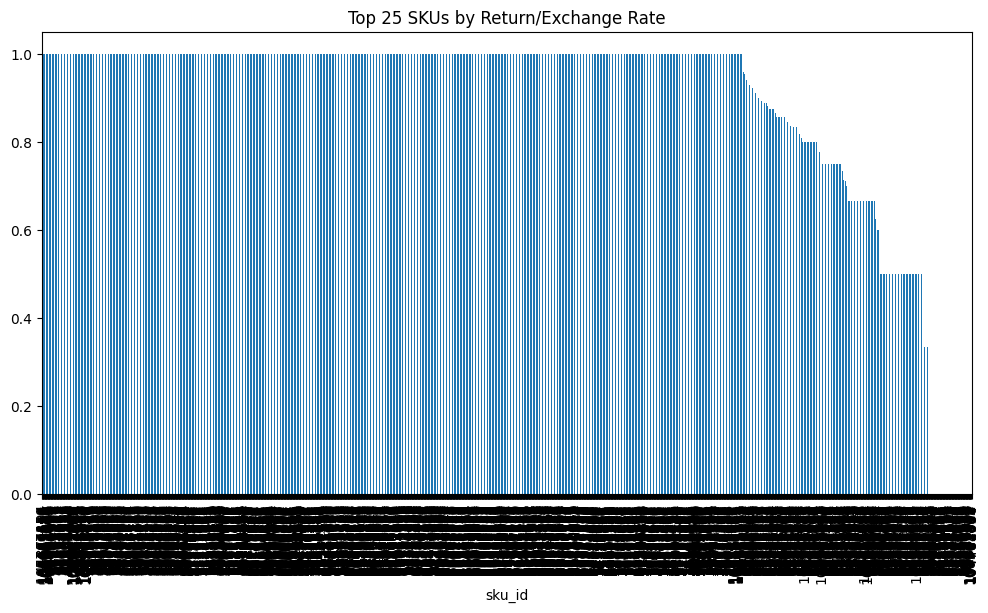

In [29]:
returns_orders = df[df['order_info'] == 'Cancelled']

return_rate_by_sku = returns_orders['sku_id'].value_counts() / df['sku_id'].value_counts()

return_rate_by_sku = return_rate_by_sku.sort_values(ascending=False)

return_rate_by_sku.head(2500).plot(kind='bar', figsize=(12,6), title='Top 25 SKUs by Return/Exchange Rate')


In [30]:
skus_1_return_rate = return_rate_by_sku[return_rate_by_sku == 1]
skus_1_return_rate.shape

(1863,)

In [ ]:
sku_profit.sort_values()

NameError: name 'sku_profit' is not defined

<Axes: title={'center': 'Top Loss making Article with Return Rate < 0.5'}, xlabel='article_type'>

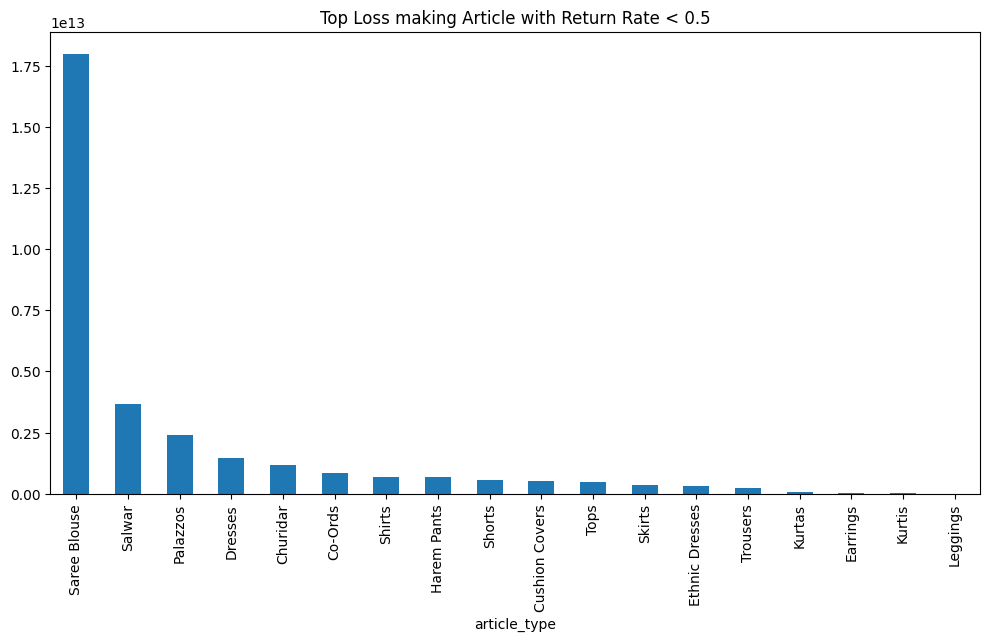

In [31]:
skus_1_profit = df[df['sku_id'].isin(skus_1_return_rate.index)]
sku_profit = skus_1_profit.groupby('article_type')['order_id'].sum()
sku_profit.sort_values(ascending=False).head(50).plot(kind='bar', figsize=(12,6), title='Top Loss making Article with Return Rate < 0.5')

In [32]:
skus_below_0_5_return_rate = return_rate_by_sku[return_rate_by_sku < 0.5]
skus_below_0_5_return_rate.shape


(16,)

<Axes: title={'center': 'Top 20 Profitable SKUs with Return Rate < 0.5'}, xlabel='article_type'>

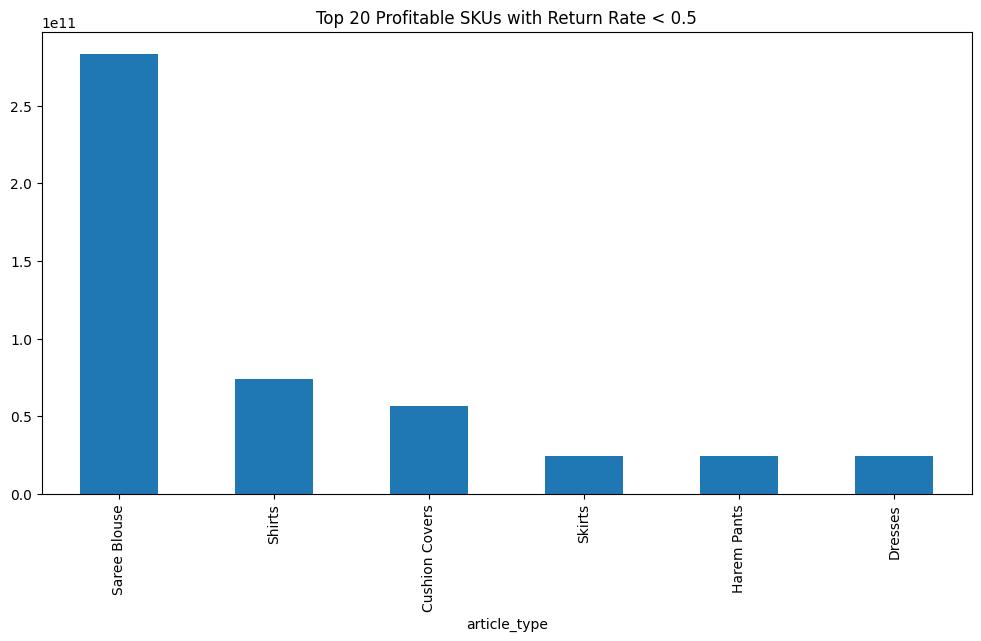

In [33]:
skus_below_0_5_profit = df[df['sku_id'].isin(skus_below_0_5_return_rate.index)]
sku_profit = skus_below_0_5_profit.groupby('article_type')['order_id'].sum()
sku_profit.sort_values(ascending=False).head(50).plot(kind='bar', figsize=(12,6), title='Top 20 Profitable SKUs with Return Rate < 0.5')

In [34]:
# Filter only Cancelled orders
cancelled_orders = df[df['order_info'] == 'Cancelled']

# Count cancelled orders by SKU
top_cancelled_skus = cancelled_orders['sku_id'].value_counts().head(10)

print(top_cancelled_skus)


sku_id
46946883    75
94164958    62
46946884    56
94164932    52
52849098    49
52849099    47
75347314    47
94164934    45
52849097    44
94164936    36
Name: count, dtype: int64


**Order Created to Packed:** This tells you how long it typically takes to pack an order once it’s created. A long delay here could indicate inefficiencies or issues in the packing process

In [35]:
df['order_created_date'] = pd.to_datetime(df['order_created_date'], format='%Y%m%d')
df['order_packed_date'] = pd.to_datetime(df['order_packed_date'], format='%Y%m%d')

df['created_to_packed_days'] = (df['order_packed_date'] - df['order_created_date']).dt.days

print(df['created_to_packed_days'].describe())


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['created_to_packed_days'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Days Taken from Order Created to Order Packed')
plt.xlabel('Days to Pack')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


KeyError: 'order_created_date'

In [ ]:
# Create 'order_info' column based on 'order_status'
df['order_info'] = df['order_status'].apply(lambda x: 'Cancelled' if ('C' in x or 'RTO' in x) else 'Completed')


<ipython-input-16-1d73274a3879>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_status_counts = df.groupby(['packing_delay_category', 'order_info']).size().unstack(fill_value=0)


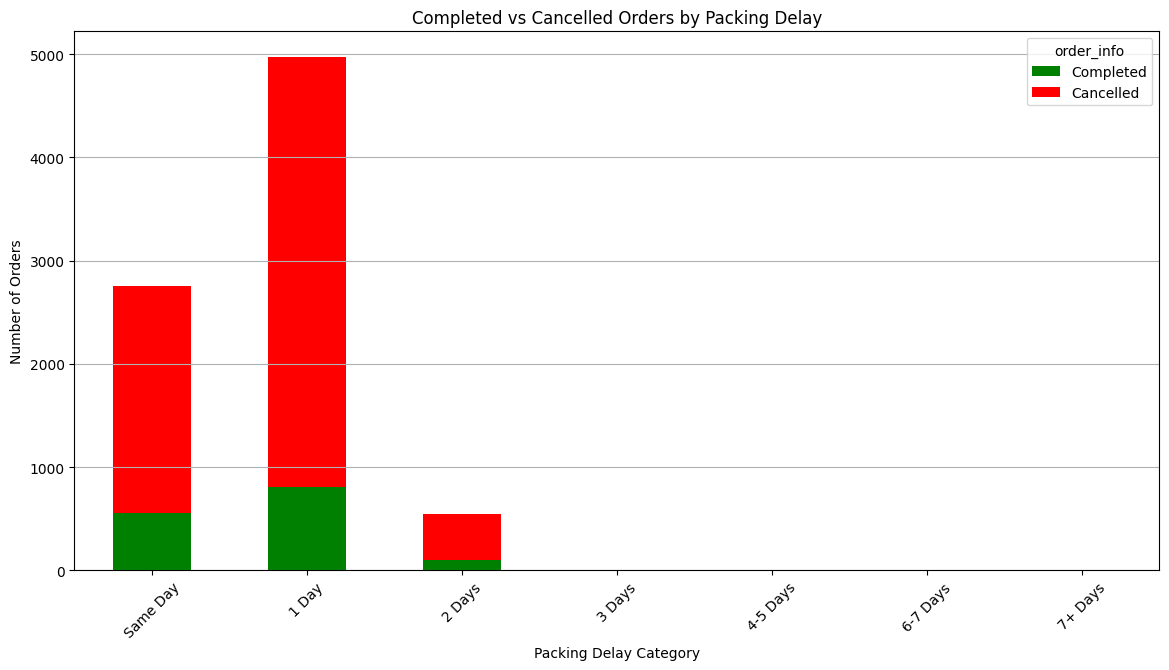

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'created_to_packed_days' and 'order_info' columns are ready

# 1. Bin the delays into categories
bins = [-1, 0, 1, 2, 3, 5, 7, 100]  # You can adjust bins if needed
labels = ['Same Day', '1 Day', '2 Days', '3 Days', '4-5 Days', '6-7 Days', '7+ Days']
df['packing_delay_category'] = pd.cut(df['created_to_packed_days'], bins=bins, labels=labels)

# 2. Group by delay category and order status (Completed / Cancelled)
delay_status_counts = df.groupby(['packing_delay_category', 'order_info']).size().unstack(fill_value=0)

# 3. Plot stacked bar chart
delay_status_counts[['Completed', 'Cancelled']].plot(kind='bar', stacked=True, figsize=(14,7), color=['green', 'red'])
plt.title('Completed vs Cancelled Orders by Packing Delay')
plt.xlabel('Packing Delay Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



**Monthly Trends**: Plot the Order Created Date over time to see if there are seasonal peaks in order volume, cancellations, or returns. For example, sales might spike around specific holidays, but cancellation rates might also increase.

<ipython-input-17-4ffc72598e32>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders = df.resample('M').size()
<ipython-input-17-4ffc72598e32>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_completed = df[df['order_info'] == 'Completed'].resample('M').size()
<ipython-input-17-4ffc72598e32>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_cancelled = df[df['order_info'] == 'Cancelled'].resample('M').size()


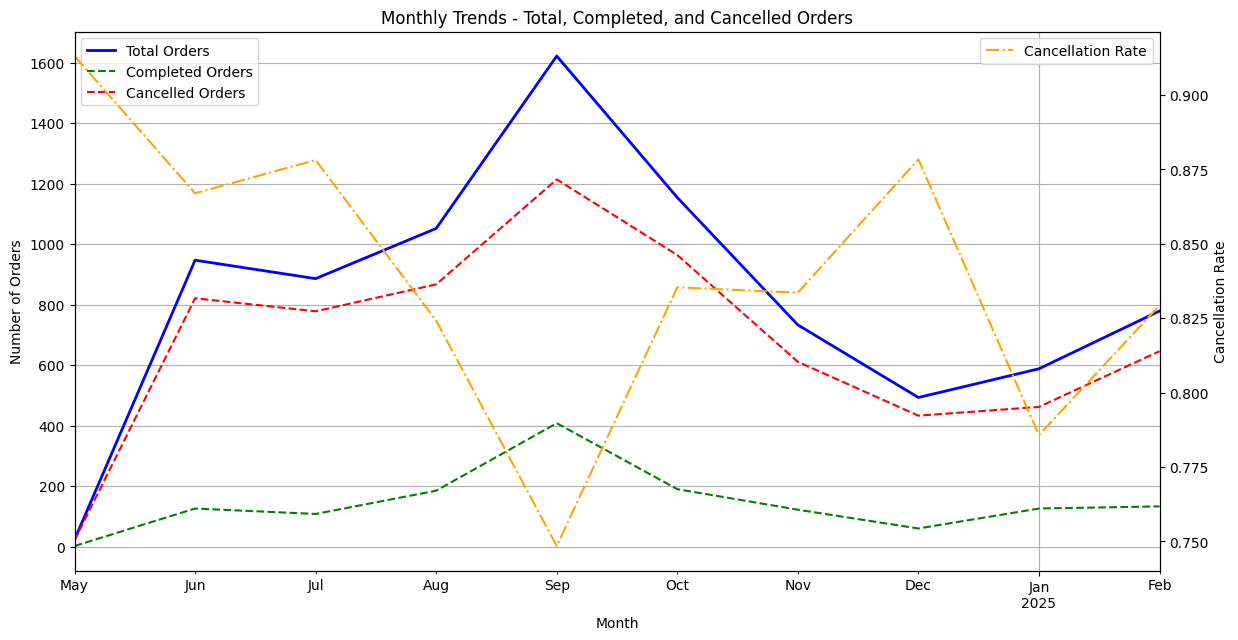

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Make sure order_created_date is datetime
df['order_created_date'] = pd.to_datetime(df['order_created_date'], format='%Y%m%d', errors='coerce')

# 2. Create 'order_info' column if not already
df['order_info'] = df['order_status'].apply(lambda x: 'Cancelled' if ('C' in x or 'RTO' in x) else 'Completed')

# 3. Set order_created_date as index
df.set_index('order_created_date', inplace=True)

# 4. Calculate monthly counts
monthly_orders = df.resample('M').size()
monthly_completed = df[df['order_info'] == 'Completed'].resample('M').size()
monthly_cancelled = df[df['order_info'] == 'Cancelled'].resample('M').size()

# 5. Calculate cancellation rate
monthly_cancellation_rate = monthly_cancelled / (monthly_completed + monthly_cancelled)

# 6. Plot
fig, ax1 = plt.subplots(figsize=(14,7))

# Plot total orders
monthly_orders.plot(ax=ax1, color='blue', label='Total Orders', linewidth=2)

# Plot completed orders
monthly_completed.plot(ax=ax1, color='green', label='Completed Orders', linestyle='--')

# Plot cancelled orders
monthly_cancelled.plot(ax=ax1, color='red', label='Cancelled Orders', linestyle='--')

ax1.set_ylabel('Number of Orders')
ax1.set_xlabel('Month')
ax1.set_title('Monthly Trends - Total, Completed, and Cancelled Orders')
ax1.legend(loc='upper left')
ax1.grid(True)

# 7. Plot cancellation rate on secondary y-axis
ax2 = ax1.twinx()
monthly_cancellation_rate.plot(ax=ax2, color='orange', label='Cancellation Rate', linestyle='-.')
ax2.set_ylabel('Cancellation Rate')
ax2.legend(loc='upper right')

plt.show()


**Category Distribution**: Analyze the distribution of products across different master categories. This helps identify which categories contribute the most to sales, returns, or cancellations.


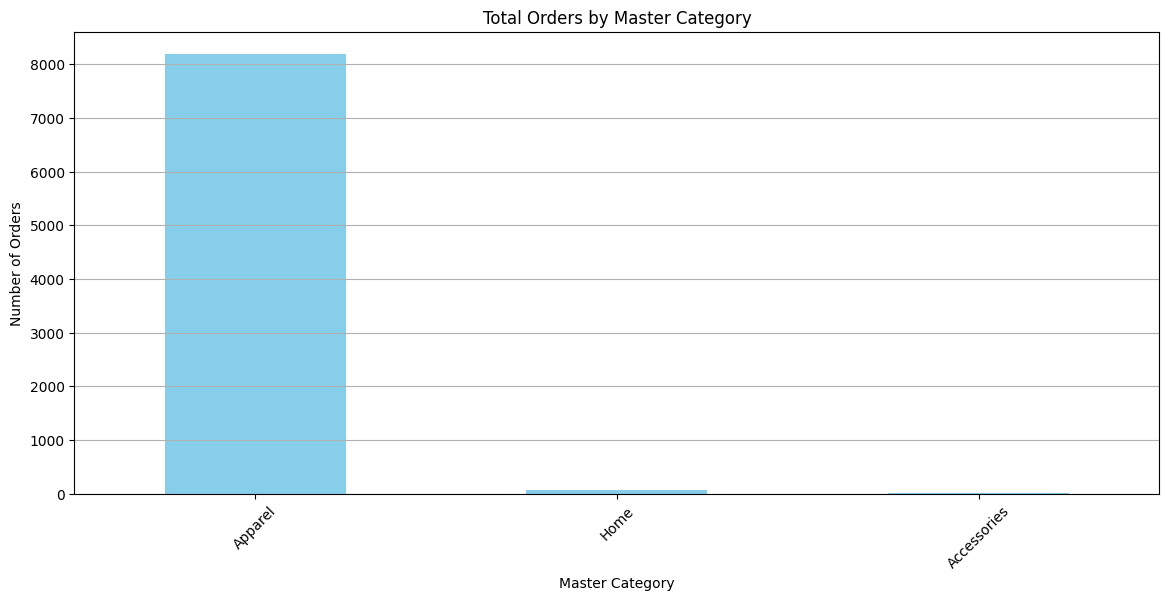

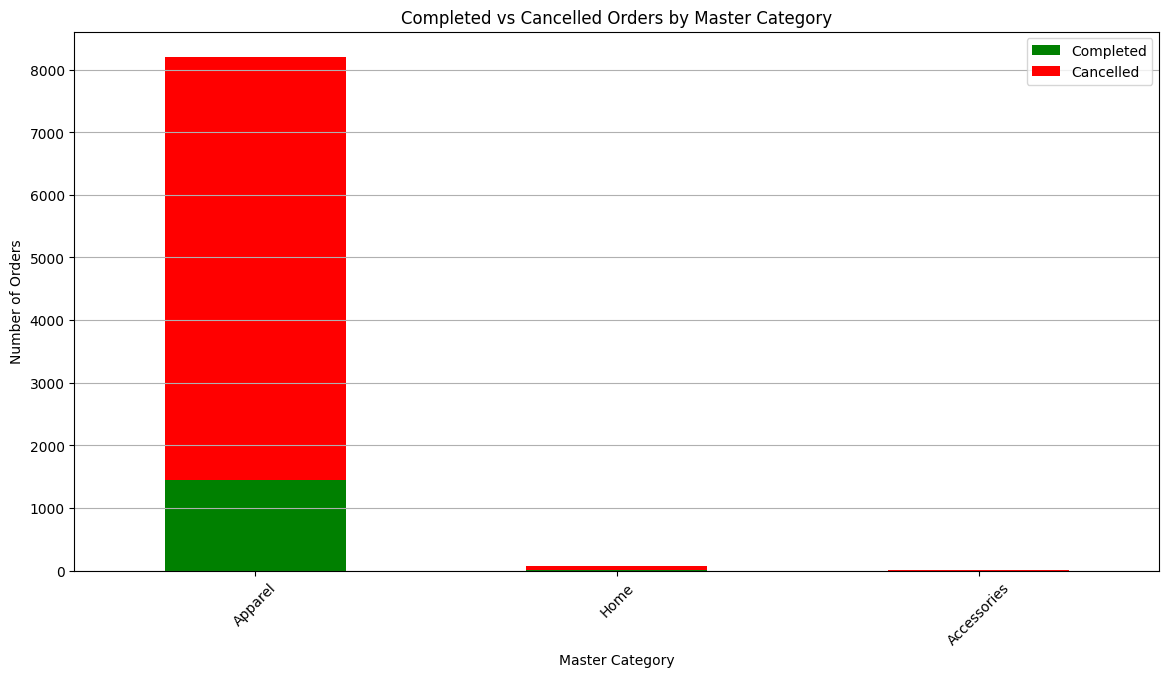

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. First, create 'order_info' if not already done
df['order_info'] = df['order_status'].apply(lambda x: 'Cancelled' if ('C' in x or 'RTO' in x) else 'Completed')

# 2. Distribution of total orders by master_category
category_total = df['master_category'].value_counts()

# 3. Distribution of completed orders by master_category
category_completed = df[df['order_info'] == 'Completed']['master_category'].value_counts()

# 4. Distribution of cancelled orders by master_category
category_cancelled = df[df['order_info'] == 'Cancelled']['master_category'].value_counts()

# 5. Plot total distribution
plt.figure(figsize=(14,6))
category_total.plot(kind='bar', color='skyblue')
plt.title('Total Orders by Master Category')
plt.xlabel('Master Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 6. Plot completed and cancelled side by side
category_compare = pd.concat([category_completed, category_cancelled], axis=1, keys=['Completed', 'Cancelled']).fillna(0)

category_compare.plot(kind='bar', figsize=(14,7), stacked=True, color=['green', 'red'])
plt.title('Completed vs Cancelled Orders by Master Category')
plt.xlabel('Master Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Profitability by Category:** Calculate the average profit per category. Are certain categories more profitable than others?

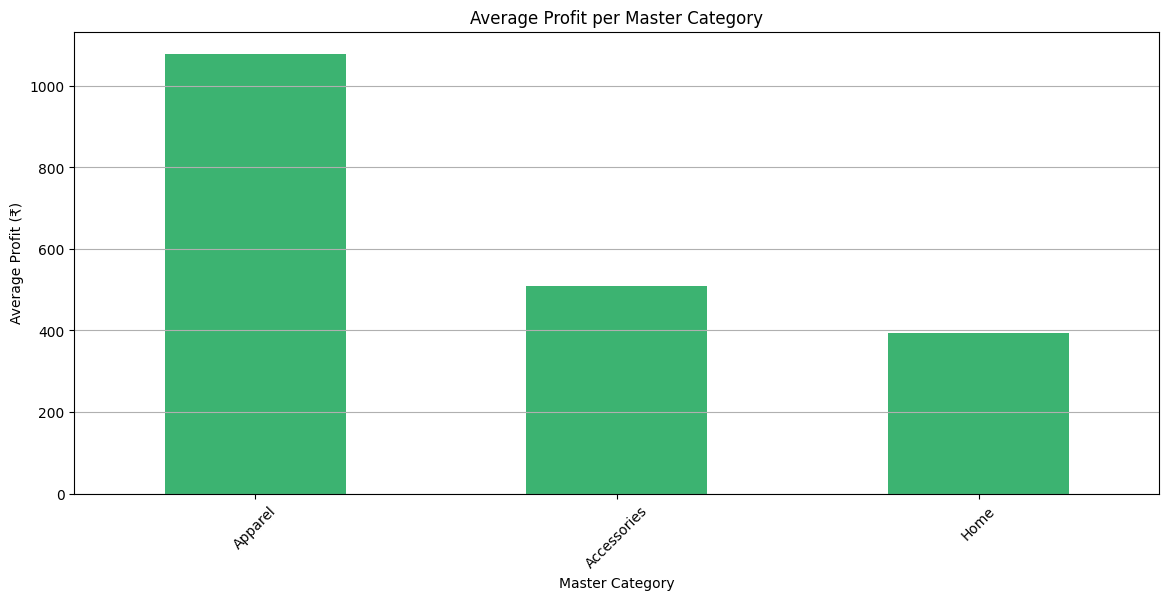

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Group by master_category and calculate average and total profit
category_profit = df.groupby('master_category')['Total_Profit'].agg(['mean', 'sum']).sort_values(by='mean', ascending=False)

# 2. Plot average profit per category
plt.figure(figsize=(14,6))
category_profit['mean'].plot(kind='bar', color='mediumseagreen')
plt.title('Average Profit per Master Category')
plt.xlabel('Master Category')
plt.ylabel('Average Profit (₹)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



**Seasonality by Category:** Plot the trend of sales or cancellations over time for each category. Are certain categories more affected by seasonal trends?


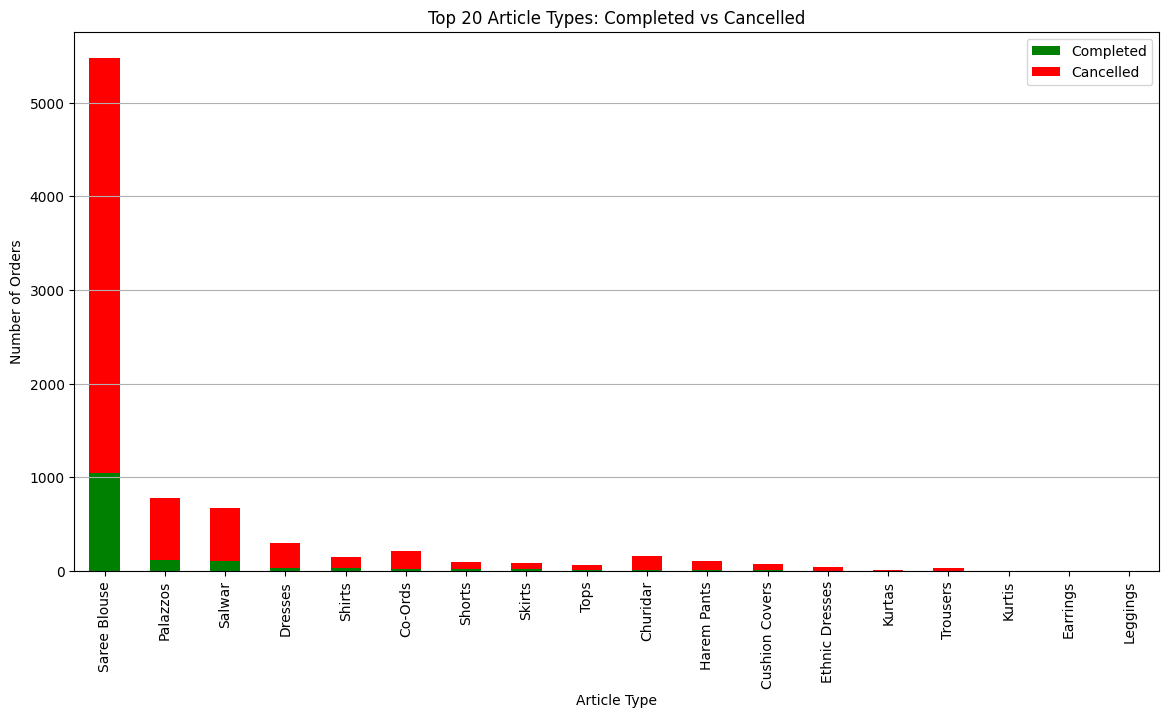

In [ ]:
# 1. Sales and cancellations by article_type
article_sales = df[df['order_info'] == 'Completed']['article_type'].value_counts()
article_cancellations = df[df['order_info'] == 'Cancelled']['article_type'].value_counts()

# 2. Combine
article_performance = pd.concat([article_sales, article_cancellations], axis=1, keys=['Completed', 'Cancelled']).fillna(0)

# 3. Plot
article_performance.head(20).plot(kind='bar', stacked=True, figsize=(14,7), color=['green', 'red'])
plt.title('Top 20 Article Types: Completed vs Cancelled')
plt.xlabel('Article Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


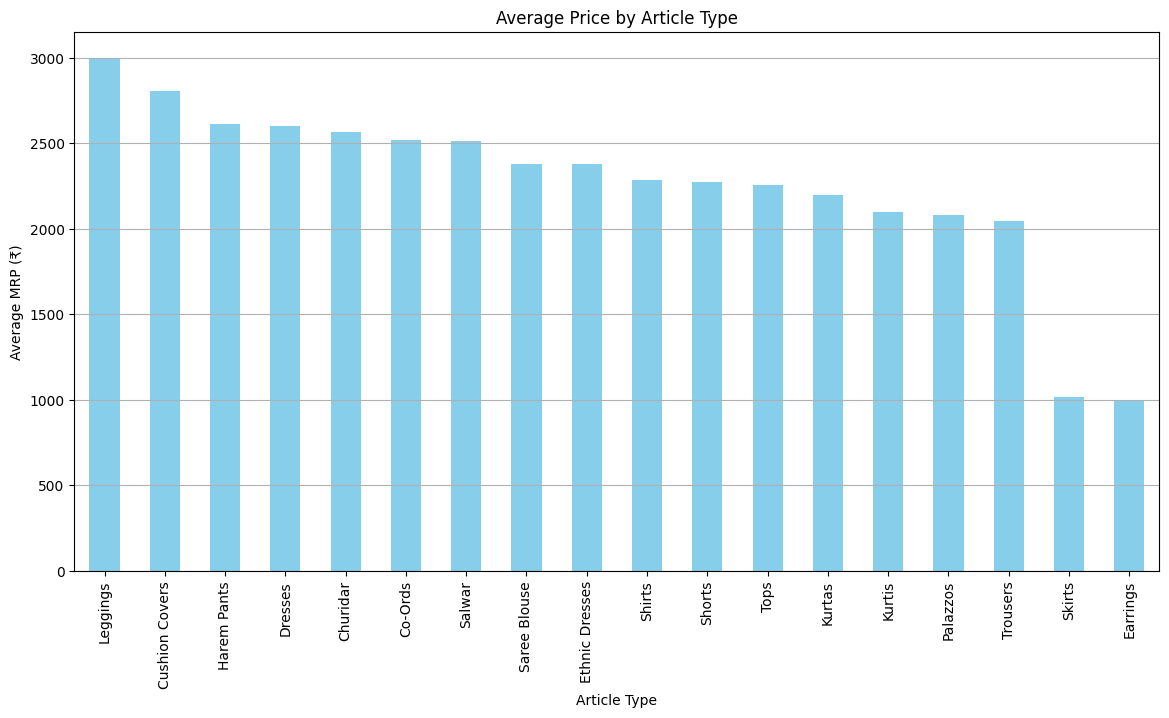

In [ ]:
# Average MRP per article type
article_avg_price = df.groupby('article_type')['MRP'].mean().sort_values(ascending=False)

# Plot
article_avg_price.head(20).plot(kind='bar', figsize=(14,7), color='skyblue')
plt.title('Average Price by Article Type')
plt.xlabel('Article Type')
plt.ylabel('Average MRP (₹)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


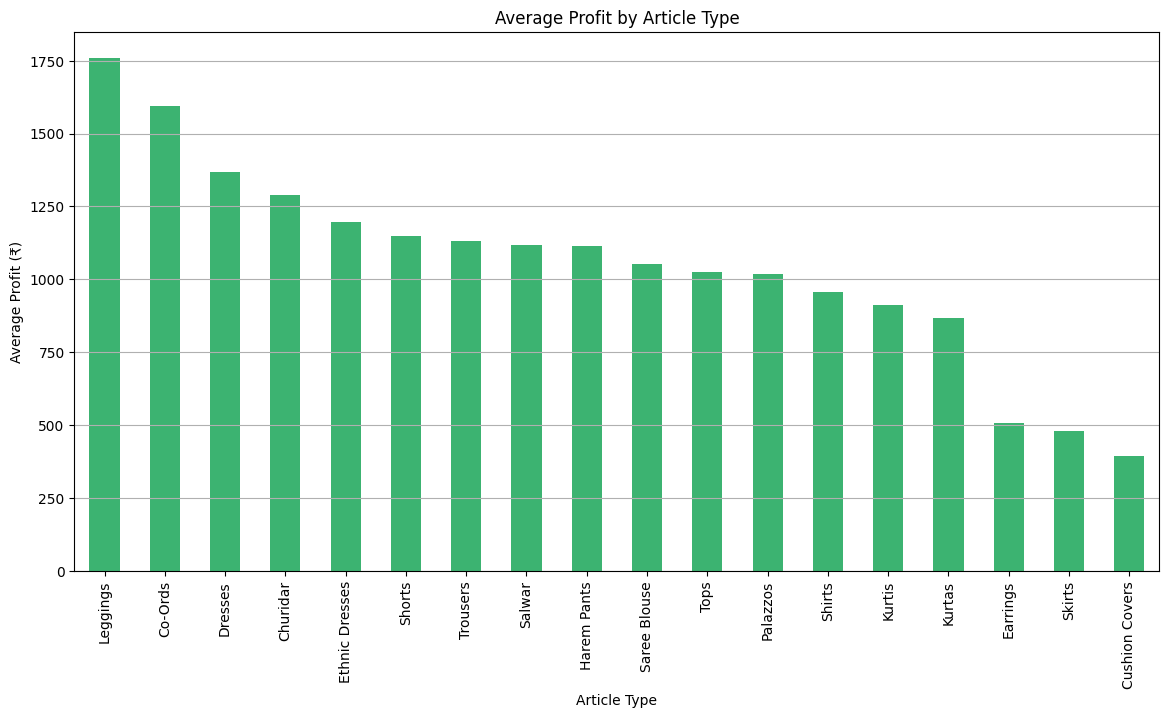

In [ ]:
# Average profit per article type
article_avg_profit = df.groupby('article_type')['Total_Profit'].mean().sort_values(ascending=False)

# Plot
article_avg_profit.head(20).plot(kind='bar', figsize=(14,7), color='mediumseagreen')
plt.title('Average Profit by Article Type')
plt.xlabel('Article Type')
plt.ylabel('Average Profit (₹)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


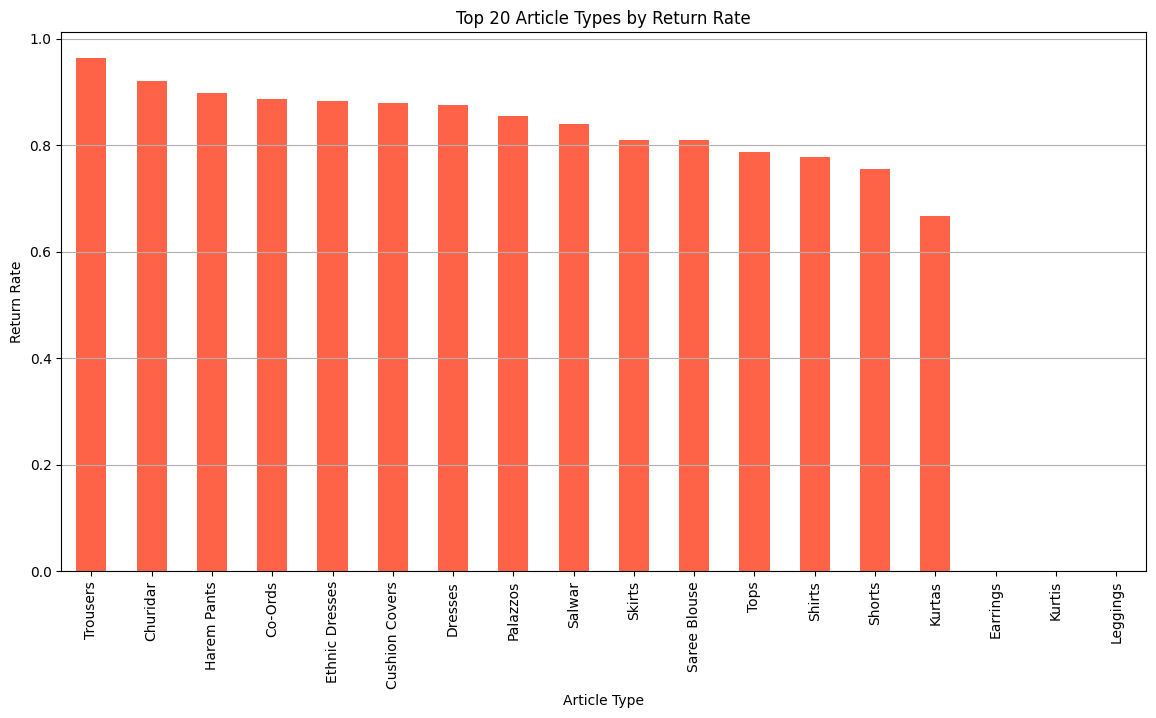

In [ ]:
# Calculate return rate by article_type
article_return_rate = article_cancellations / (article_sales + article_cancellations)

# Plot
article_return_rate.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(14,7), color='tomato')
plt.title('Top 20 Article Types by Return Rate')
plt.xlabel('Article Type')
plt.ylabel('Return Rate')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


<ipython-input-37-d49980580905>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_article_sales = df[df['order_info'] == 'Completed'].groupby([pd.Grouper(freq='M'), 'article_type']).size().unstack(fill_value=0)


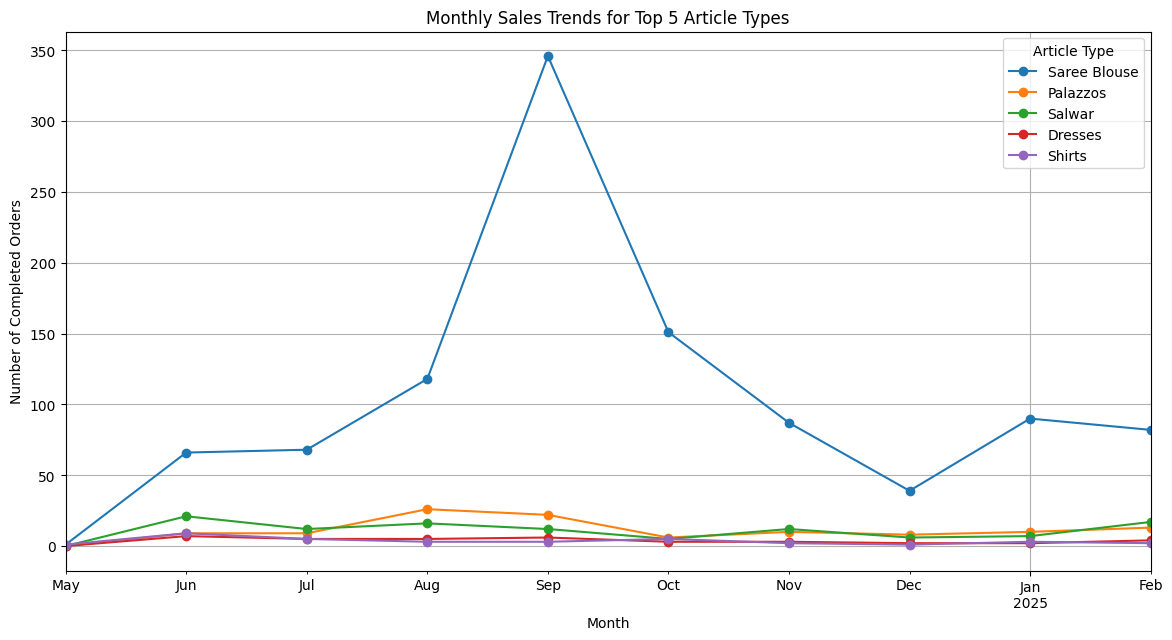

In [ ]:
# Sales trend over time for article types
monthly_article_sales = df[df['order_info'] == 'Completed'].groupby([pd.Grouper(freq='M'), 'article_type']).size().unstack(fill_value=0)

# Pick top 5 article types
top5_articles = monthly_article_sales.sum().sort_values(ascending=False).head(5).index

# Plot trends
monthly_article_sales[top5_articles].plot(figsize=(14,7), marker='o')
plt.title('Monthly Sales Trends for Top 5 Article Types')
plt.xlabel('Month')
plt.ylabel('Number of Completed Orders')
plt.grid(True)
plt.legend(title='Article Type')
plt.show()


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create 'order_info' if not already

# 2. Group by (master_category, article_type) and calculate counts
combo_performance = df.groupby(['master_category', 'article_type']).order_info.value_counts().unstack(fill_value=0)

# 3. Calculate total orders and cancellation rate
combo_performance['Total_Orders'] = combo_performance['Completed'] + combo_performance['Cancelled']
combo_performance['Cancellation_Rate'] = combo_performance['Cancelled'] / combo_performance['Total_Orders']

# 4. Filter for combos with decent volume (say >50 orders) to avoid noise
combo_filtered = combo_performance[combo_performance['Total_Orders'] > 50]

# 5. Sort and check top cancelling combinations
top_cancelling_combos = combo_filtered.sort_values('Cancellation_Rate', ascending=False).head(20)

print(top_cancelling_combos[['Total_Orders', 'Cancellation_Rate']])


order_info                      Total_Orders  Cancellation_Rate
master_category article_type                                   
Apparel         Churidar                 165           0.945455
                Co-Ords                  210           0.919048
                Harem Pants              107           0.915888
                Tops                      66           0.909091
                Dresses                  299           0.906355
Home            Cushion Covers            74           0.905405
Apparel         Salwar                   674           0.900593
                Palazzos                 775           0.899355
                Saree Blouse            5482           0.873586
                Shorts                    94           0.872340
                Skirts                    84           0.857143
                Shirts                   153           0.849673


In [ ]:
category_sales = df['master_category'].value_counts()
category_sales

,count
master_category,
Apparel,8198
Home,74
Accessories,5


In [ ]:
# Profitability by category
category_profit = df.groupby('master_category')['Total_Profit'].mean().sort_values(ascending=False)

# Cancellation rate by category
category_cancellations = df[df['order_info'] == 'Cancelled']['master_category'].value_counts()
category_total_orders = df['master_category'].value_counts()
category_cancellation_rate = (category_cancellations / category_total_orders).sort_values(ascending=False)


In [ ]:
category_summary = pd.DataFrame({
    'Total_Orders': category_total_orders,
    'Avg_Profit_Per_Order': category_profit,
    'Cancellation_Rate': category_cancellation_rate
}).fillna(0).sort_values('Total_Orders', ascending=False)

print(category_summary)


                 Total_Orders  Avg_Profit_Per_Order  Cancellation_Rate
master_category                                                       
Apparel                  8198           1078.971025           0.823006
Home                       74            392.767357           0.878378
Accessories                 5            509.019891           1.000000


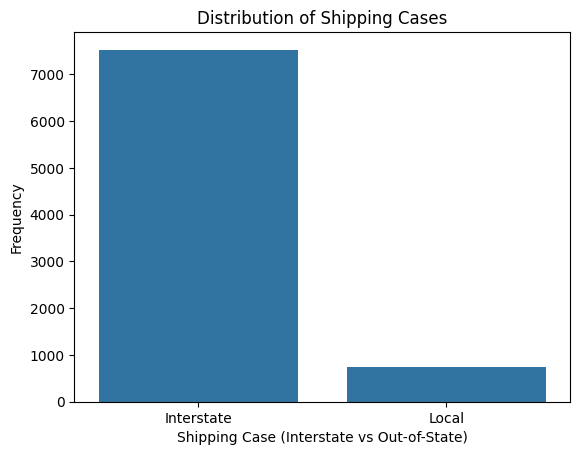

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution of Shipping Case
sns.countplot(data=df, x='Shipping_case')
plt.title('Distribution of Shipping Cases')
plt.xlabel('Shipping Case (Interstate vs Out-of-State)')
plt.ylabel('Frequency')
plt.show()


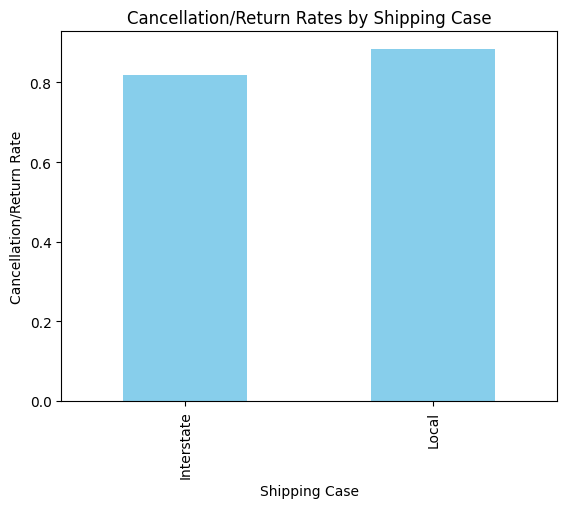

In [ ]:
# Calculate cancellation rate by Shipping Case
cancellation_rate_shipping = df[df['order_info'].isin(['Cancelled'])].groupby('Shipping_case').size() / df.groupby('Shipping_case').size()

# Plotting the cancellation rate
cancellation_rate_shipping.plot(kind='bar', color='skyblue')
plt.title('Cancellation/Return Rates by Shipping Case')
plt.xlabel('Shipping Case')
plt.ylabel('Cancellation/Return Rate')
plt.show()


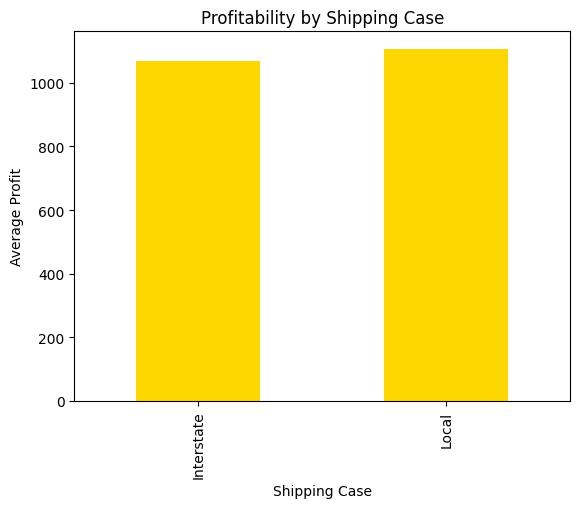

In [ ]:
# Calculate profitability by Shipping Case
df['profit'] = df['Net_Amount'] - df['shipping_charges']
profit_by_shipping_case = df.groupby('Shipping_case')['Total_Profit'].mean()

# Plotting the profitability
profit_by_shipping_case.plot(kind='bar', color='gold')
plt.title('Profitability by Shipping Case')
plt.xlabel('Shipping Case')
plt.ylabel('Average Profit')
plt.show()


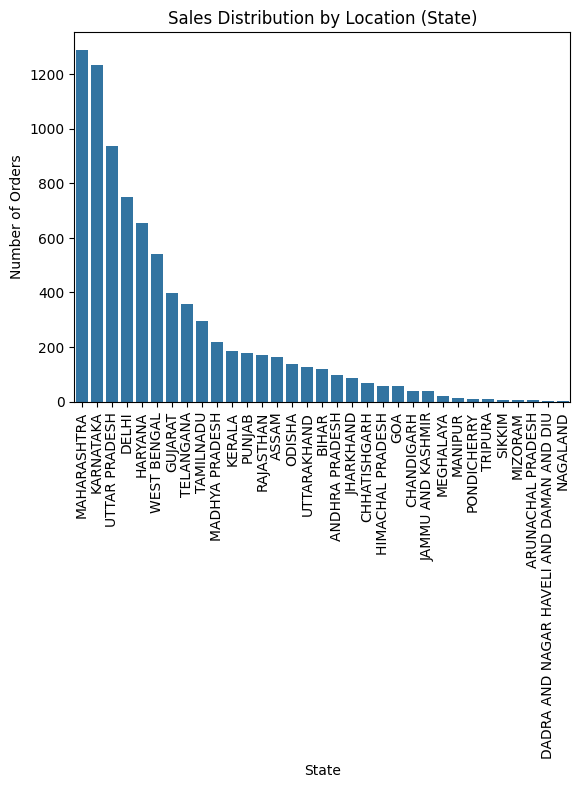

In [ ]:
# Sales distribution by Location
sns.countplot(data=df, x='location', order=df['location'].value_counts().index)
plt.title('Sales Distribution by Location (State)')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()


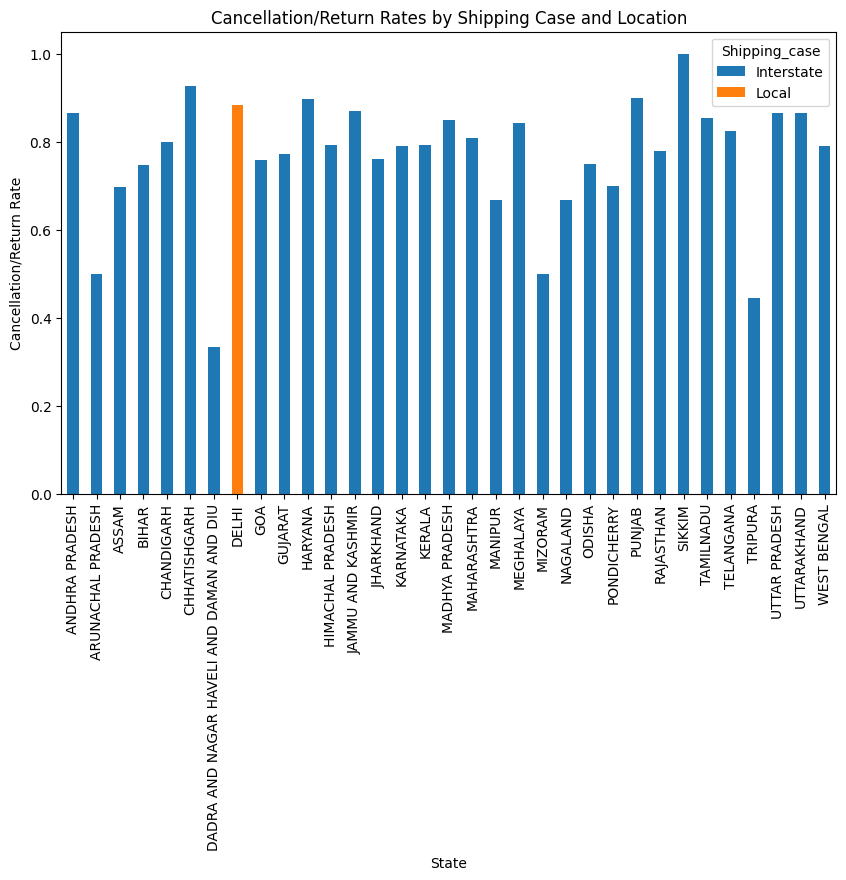

In [ ]:
# Calculate cancellation/return rate by both Location and Shipping Case
cancellation_rate_location_shipping = df[df['order_info'].isin(['Cancelled', 'Returned'])].groupby(['location', 'Shipping_case']).size() / df.groupby(['location', 'Shipping_case']).size()

# Sort the cancellation rate by location and shipping case in descending order
cancellation_rate_location_shipping = cancellation_rate_location_shipping.sort_values(ascending=False)

# Plotting the cancellation rate by both factors (Location and Shipping Case)
cancellation_rate_location_shipping.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cancellation/Return Rates by Shipping Case and Location')
plt.xlabel('State')
plt.ylabel('Cancellation/Return Rate')
plt.xticks(rotation=90)
plt.show()



In [ ]:
df['cashback'].unique()

array([0.])

In [ ]:
df['gift_charges'].unique()

array([0])

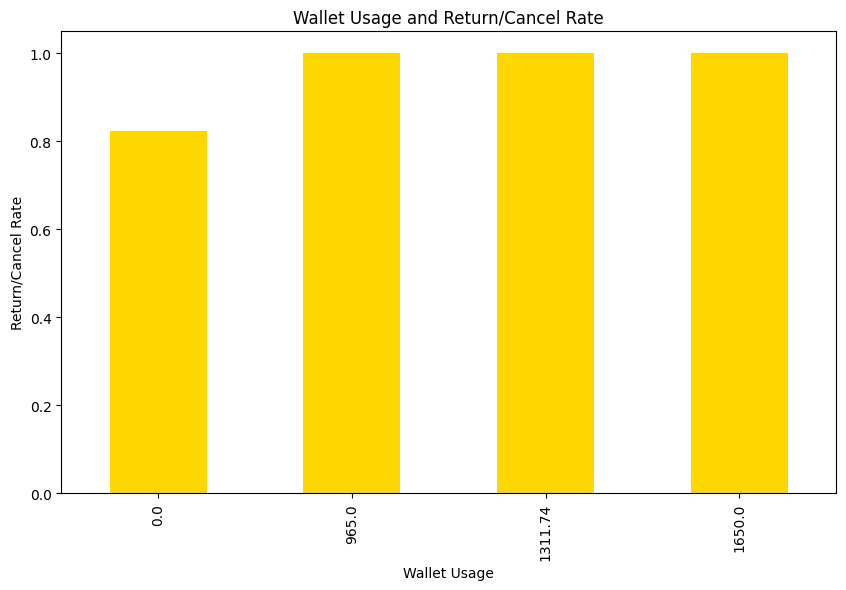

In [ ]:
# Assuming 'Wallet' column exists
df['Wallet'] = pd.to_numeric(df['wallet'], errors='coerce')

# Correlation between Wallet and Return/Cancel
wallet_return_corr = df[df['order_info'].isin(['Cancelled', 'Returned'])].groupby('Wallet').size()
wallet_return_corr = wallet_return_corr / df.groupby('Wallet').size()

# Plot
plt.figure(figsize=(10,6))
wallet_return_corr.plot(kind='bar', color='gold')
plt.title('Wallet Usage and Return/Cancel Rate')
plt.xlabel('Wallet Usage')
plt.ylabel('Return/Cancel Rate')
plt.show()


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Group by (master_category, article_type) and calculate counts
combo_performance = df.groupby(['master_category', 'article_type']).order_info.value_counts().unstack(fill_value=0)

# 3. Calculate total orders and cancellation rate
combo_performance['Total_Orders'] = combo_performance['Completed'] + combo_performance['Cancelled']
combo_performance['Cancellation_Rate'] = combo_performance['Cancelled'] / combo_performance['Total_Orders']

# 4. Filter for combos with decent volume (say >50 orders) to avoid noise
combo_filtered = combo_performance[combo_performance['Total_Orders'] > 0]

# 5. Sort and check top cancelling combinations
top_cancelling_combos = combo_filtered.sort_values('Cancellation_Rate', ascending=False)
print(top_cancelling_combos[['Total_Orders', 'Cancellation_Rate']])

order_info                      Total_Orders  Cancellation_Rate
master_category article_type                                   
Accessories     Earrings                   5           1.000000
Apparel         Leggings                   1           1.000000
                Trousers                  28           1.000000
                Kurtis                     5           1.000000
                Ethnic Dresses            43           0.953488
                Churidar                 165           0.945455
                Co-Ords                  210           0.919048
                Harem Pants              107           0.915888
                Tops                      66           0.909091
                Dresses                  299           0.906355
Home            Cushion Covers            74           0.905405
Apparel         Salwar                   674           0.900593
                Palazzos                 775           0.899355
                Saree Blouse            

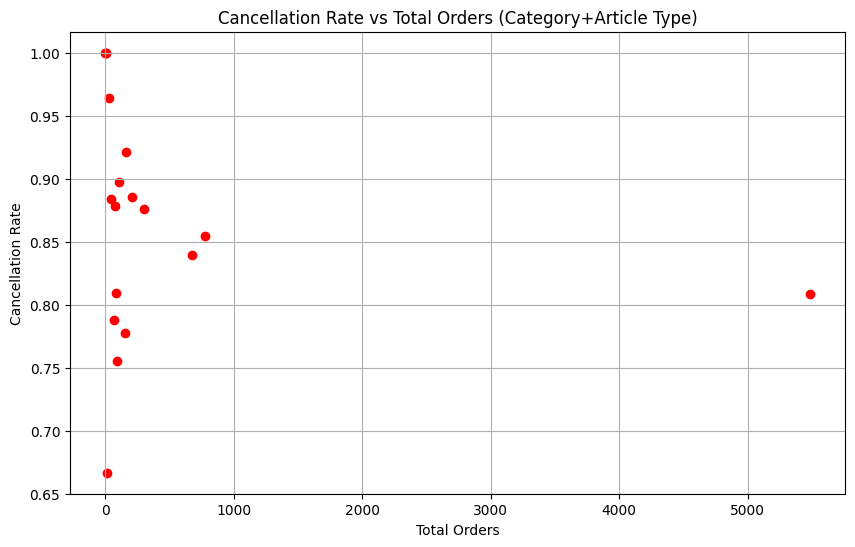

In [ ]:
# Scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(combo_filtered['Total_Orders'], combo_filtered['Cancellation_Rate'], color='red')
plt.title('Cancellation Rate vs Total Orders (Category+Article Type)')
plt.xlabel('Total Orders')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.show()


In [ ]:
df.columns

Index(['order_id', 'item_id', 'sku_id', 'packet_id', 'pps_item_id',
       'order_status', 'item_status', 'gender', 'payment_method', 'quantity',
       'order_created_date', 'order_packed_date', 'order_shipped_date',
       'order_rto_date', 'master_category', 'brand', 'article_type',
       'seller_id', 'seller_name', 'seller_type', 'pincode', 'is_try_and_buy',
       'warehouse_id', 'warehouse_name', 'Shipping_case', 'state', 'address',
       'location', 'tax_rate', 'igst_rate', 'cgst_rate', 'sgst_rate',
       'igst_amt', 'tax_amount', 'loyalty_credit', 'loyalty_Amount',
       'InvoiceAmount', 'shipment_value', 'platform_charges', 'MRP',
       'shipping_charges', 'gift_charges', 'Discount', 'cashback',
       'Tax_user_rec', 'GiftCard', 'wallet', 'Vat_refund', 'Mynts_Used',
       'Instant_Cashback', 'Value_Shipping', 'TCS', 'Net_Amount',
       'New_Parent_id', 'Seller_GSTIN', 'Tax_Seller_GSTIN', 'base_amount',
       'tds_rate', 'tcs_amount', 'tds_amount', 'cgst_tcs_amount',
 

In [ ]:
potential_revenue_loss = df[(df['order_status'] == 'C') | (df['order_status'] == 'RTO') | (df['order_status'] == 'F')]['shipment_value'].sum()
net_loss_in_platform_charge=df[(df['order_status'] == 'C') | (df['order_status'] == 'RTO') | (df['order_status'] == 'F')]['platform_charges'].sum()

In [ ]:
 total_delivered_orders =df[(df['order_status'] == 'SH') | (df['order_status'] == 'PK')]['shipment_value'].sum()

In [ ]:
total_delivered_orders  - net_loss_in_platform_charge

np.float64(989909.787066)

In [ ]:
df['Total_Profit'].sum() - net_loss_in_platform_charge

np.float64(8806619.133495461)

In [ ]:
potential_revenue_loss

np.float64(8222279.0)